# import libs and connecting to database

In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [3]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname = db
                        )

In [4]:
cur = conn.cursor()

# q1

In [5]:
sql_q1 = """
        select * from gp1.student
        """

In [6]:
df = pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,major
0,jsmith@jmu.edu,john smith,IA
1,ljames@jmu.edu,lebron james,IA
2,esanch@jmu.edu,elijah sanchez,physics
3,mtrubis@jmu.edu,mitchell trubisky,ISAT
4,s5@jmu.edu,s5,GS


#q2

In [7]:
sql_q2 = """
        select gp1.professor.p_name,
        gp1.course.c_name
        from gp1.professor
        inner join gp1.course
        on gp1.professor.p_email = gp1.course.p_email
        """

In [8]:
df = pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,noel hendrickson,counterfactual reasoning
1,stephen marrin,selected topics in IA
2,michael jordan,data dunking
3,michael jordan,intro to national security
4,jeremy_lin,intro_to_intel
5,jeremy_lin,data mining


# q3

In [9]:
sql_q3 = """
        select c_num,
        count(c_num) as enrolled
        from gp1.enroll_list
        group by c_num
        order by enrolled desc
        """

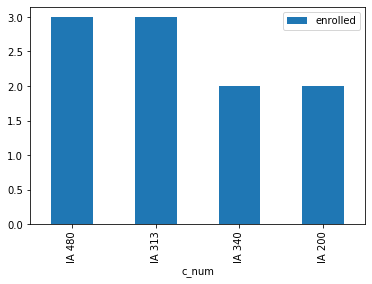

In [10]:
df = pandas.read_sql_query(sql_q3,conn)
df[:]
df.plot.bar(y = 'enrolled', x = "c_num")

In [11]:
sql_q4 = """
        select gp1.professor.p_name,
        count(gp1.course.c_name) as teaching_number
        from gp1.professor
        inner join gp1.course
        on gp1.professor.p_email = gp1.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

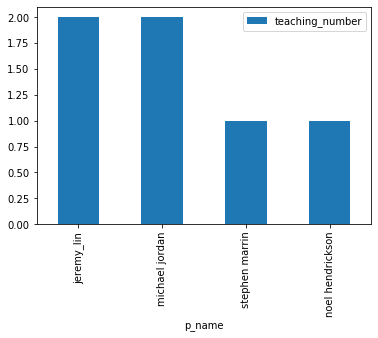

In [12]:
df = pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y = 'teaching_number', x = 'p_name')

# q5

In [13]:
sql_q5_professor = """
                   insert into gp1.professor(p_email,p_name,office_num)
                   values ('{}','{}','{}')
                    """.format('jlin@jmu.edu','jeremy_lin','isat 170')

In [14]:
cur.execute(sql_q5_professor)

IntegrityError: duplicate key value violates unique constraint "professor_pkey"
DETAIL:  Key (p_email)=(jlin@jmu.edu) already exists.


In [15]:
conn.commit()

In [16]:
df = pandas.read_sql_query('select * from gp1.professor',conn)
df[:]

,p_email,p_name,office_num
0,weixx@jmu.edu,xuebin wei,hhs112
1,hendrinx@jmu.edu,noel hendrickson,isat312
2,moore8ka@jmu.edu,kathleen moore,null
3,marrinsp@jmu.edu,stephen marrin,online
4,mjordan@jmu.edu,michael jordan,isat230
5,jlin@jmu.edu,jeremy_lin,isat 170


In [17]:
sql_q5_course = """
                   insert into gp1.course(c_num,c_name,room,p_email)
                   values ('{}','{}','{}','{}')
                    """.format('IA 400','intro_to_intel','online','jlin@jmu.edu')

In [18]:
cur.execute(sql_q5_course)

IntegrityError: duplicate key value violates unique constraint "course_pkey"
DETAIL:  Key (c_num)=(IA 400) already exists.


In [19]:
conn.commit()

In [20]:
df = pandas.read_sql_query('select * from gp1.course',conn)
df[:]

,c_num,c_name,room,p_email
0,IA 313,counterfactual reasoning,online,hendrinx@jmu.edu
1,IA 480,selected topics in IA,online,marrinsp@jmu.edu
2,ia 230,data dunking,online,mjordan@jmu.edu
3,IA 200,intro to national security,isat 300,mjordan@jmu.edu
4,IA 400,intro_to_intel,online,jlin@jmu.edu
5,IA 340,data mining,online,jlin@jmu.edu


# q6

In [21]:
sql_q6_course = """
                update gp1.course
                set p_email = '{}'
                where p_email = '{}'
                """.format('jlin@jmu.edu','weixx@jmu.edu')

In [22]:
cur.execute(sql_q6_course)

In [23]:
conn.commit()

In [24]:
df = pandas.read_sql_query('select * from gp1.course',conn)
df[:]

,c_num,c_name,room,p_email
0,IA 313,counterfactual reasoning,online,hendrinx@jmu.edu
1,IA 480,selected topics in IA,online,marrinsp@jmu.edu
2,ia 230,data dunking,online,mjordan@jmu.edu
3,IA 200,intro to national security,isat 300,mjordan@jmu.edu
4,IA 400,intro_to_intel,online,jlin@jmu.edu
5,IA 340,data mining,online,jlin@jmu.edu


In [25]:
sql_q6_professor = """
                    delete from gp1.professor
                    where p_email = '{}'
                    """.format('weixx@jmu.edu')

In [26]:
conn.commit()

In [27]:
df = pandas.read_sql_query('select * from gp1.course',conn)
df[:]

,c_num,c_name,room,p_email
0,IA 313,counterfactual reasoning,online,hendrinx@jmu.edu
1,IA 480,selected topics in IA,online,marrinsp@jmu.edu
2,ia 230,data dunking,online,mjordan@jmu.edu
3,IA 200,intro to national security,isat 300,mjordan@jmu.edu
4,IA 400,intro_to_intel,online,jlin@jmu.edu
5,IA 340,data mining,online,jlin@jmu.edu


## close connection

In [28]:
cur.close()
conn.close()